# Poisson process (cont'd)

Recall the dCKE for the poisson process (also know as the master equation!)

$$\partial P(n,t|n',t')=d[P(n-1,t|n',t')-P(n,t|n',t')]$$

Let's use the characteristic function to tease out how a of the poisson process distribution evolves in time

$$G(s,t)=\left\langle e^{ins}\right\rangle =\sum_{n}P(n,t|n',t')e^{ins}$$

This leads to the ODE
$$\partial_{t}G(s,t)=d[\exp(is)-1]G(s,t)$$

With solution
$$G(s,t)=\exp\left\{ td[\exp(is)-1]\right\} $$

Matching the characteristic function of a poisson distribution
$$P(n,t|0,0)=\frac{(td)^{n}\exp(-td)}{n!}$$

Therefore the mean value is 
$$E[N(t)]=\left\langle N(t) \right\rangle=td$$

How to numerically simulate this process?

## Building up my poisson process
- First draw an exponential random variable,
- Next, Once you draw that exponential random variable, save it as the time in which the increment occurred.
- Then, increase the counter N in one.
- Finally repeat.

In [95]:
m<-10
N<-0
lambda<-1
t<-rep(0,m)
p<-rep(0,m)

for (i in 1:m)
{
    # Exponential random variable
    U=runif(1) 
    X<--1/lambda*log(U)
    # Increase in one the number of events
    N<-N+1
    # record the number of events until time t
    t[i]<-X
    p[i]<-N
}
#p
#t

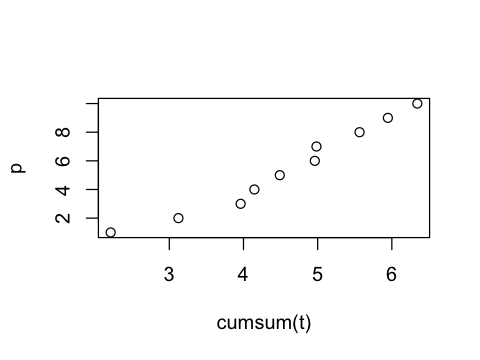

In [96]:
options(repr.plot.width=4, repr.plot.height=3)
plot(cumsum(t),p)
#cumsum(t)

## Sampling at arbitrary times the given trajectory

What if you want the number of events at arbitrary times different from the event times.

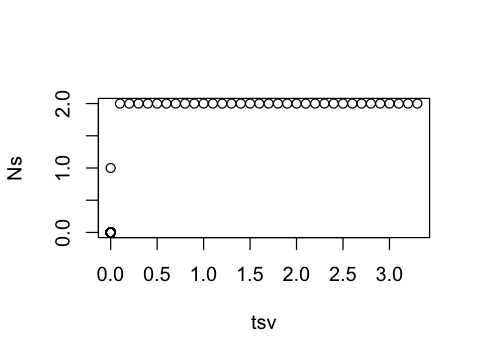

In [104]:
# Sampling a given trajectory in fixed time steps
tf<-1
m<-20
N<-0
lambda<-1
t<-rep(0,m)
p<-rep(0,m)
Ns<-rep(0,1000)
tsv<-rep(0,1000)
ts<-0
dt<-0.1
j<-1
X<-0

while(ts<=tf)
{
  U=runif(1)
  X<-X-1/lambda*log(U)
  N<-N+1
  
  while(ts<=X){
    Ns[j]<-N 
    tsv[j]<-ts
    j<-j+1
    ts<-ts+dt
    }
} 
#p 
#t
#qplot(cumsum(t),p)
#tsim<-cumsum(t)
plot(tsv,Ns)
#tsv
#j

## Generating multiple trajectories

2.5%   50% 97.5% 
    4    10    16

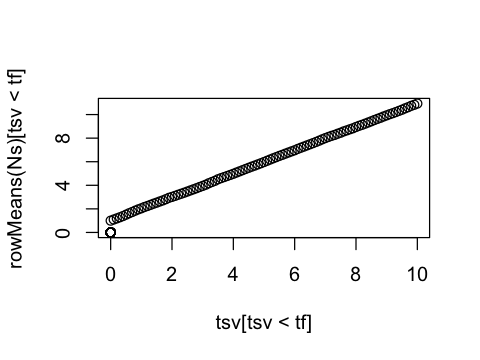

In [105]:
# Sampling a given trajectory in fixed time steps
tf<-10
lambda<-1
nexp<-1000
Ns<-matrix(0,1000,nexp)
tsv<-rep(0,1000)

for (k in 1:nexp) 
{
    ts<-0
    dt<-0.1
    j<-1
    X<-0
    N<-0

    while(ts<=tf)
    {
      U=runif(1)
      X<-X-1/lambda*log(U)
      N<-N+1

      while(ts<=X){
        Ns[j,k]<-N
        tsv[j]<-ts
        j<-j+1
        ts<-ts+dt
        }
    }
}
#p
#t
#qplot(cumsum(t),p)
#tsim<-cumsum(t)
#plot(tsv,Ns)
#tsv
#j
quantile(Ns[90,],c(0.025,0.5,0.975))
#hist(Ns[90,])
#mean(Ns[90,])
#var(Ns[90,])

plot(tsv[tsv<tf],rowMeans(Ns)[tsv<tf])